In [386]:
import re
import os
import tweepy 
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [379]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

nltk.download('stopwords')
# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lihangqian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
API_key = "BMKPfpLYmWL4FlQ3xBYwHyR3C"   
API_key_secret = "bw78ZRgeRGUF9PW8oq5VgdyaxCXKqpLj0TDrEf4Spb9knByPMt"   
access_token = "1227382295839072256-fikcUBGnAkBzS6JL30izpm7TEibIbj"   
access_token_secret = "4OldcYBWQSa3Cc6tGmjUhxGREuMM7Myv6XOM2enrg8Zsh" 
auth = tweepy.OAuthHandler(API_key, API_key_secret)    
auth.set_access_token(access_token, access_token_secret)   
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

### data collection：

As for different cities and areas, we are going to choose different cities and areas: including the cities and rural areas.

In [77]:
# hashtag: 

# vaccine,covid19vaccine,vaccinated,getvaccinated,covidvaccine,vaccinated,astrazeneca,oxfordastrazeneca,pfizer,pfizerbiontech,pfizervaccine,moderna,modernavaccine,sputnik,sputnikvaccinated,janssen,johnsonandjohnson

In [4]:
text_query = '#vaccine OR #vaccination OR #vaccineforall OR #vaccinated OR #covidvaccine OR #covid19vaccine OR #getvaccinated OR #astrazeneca OR #oxfordastrazeneca OR #pfizer OR #pfizerbiontech OR #pfizervaccine OR #moderna OR #modernavaccine OR #sputnik OR #sputnikvaccinated OR #janssen OR #johnsonandjohnson'
max_tweets= 10000

In [182]:
def get_twitter_by_location(text_query,max_tweets,coordinates):
    
    # within a 50-mile radius of Las Vegas, NV (Lat 36.169786, Long -115.139858) that have the keyword Coronavirus.
    #coordinates = '36.169786,-115.139858,100mi'
    # Creation of query method using parameters
    tweets = tweepy.Cursor(api.search, tweet_mode='extended', q = text_query, geocode = coordinates, count = 100).items(max_tweets)
#     tweets = tweepy.Cursor(api.search, q = text_query, geocode = coordinates, count = 100).items(max_tweets)
    # Pulling information from tweets iterable object
    # Add or remove tweet information you want in the below list comprehension
    tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image, tweet.lang] for tweet in tweets]
    
    # Creation of dataframe from tweets_list
    # Did not include column names to simplify code
    tweets_df = pd.DataFrame(tweets_list)
    return tweets_df

#### Las Vegas, NV (Lat 36.169786, Long -115.139858)

In [183]:
# tweets_df_LasVegas=get_twitter_by_location(text_query,max_tweets,'36.169786,-115.139858,100mi')
# tweets_df_LasVegas.to_csv('twitter0427/tweets_df_LasVegas.csv',index=False,header=False)

In [248]:
# tweets_df_LasVegas.head()

#### Centerville Township (Lat 38.22183, Long -95.01414) 
which is the poorest town in the USA

In [184]:
# tweets_df_CentervilleTownship=get_twitter_by_location(text_query,max_tweets,'38.22183,-95.01414,100mi')
# tweets_df_CentervilleTownship.to_csv('twitter0427/tweets_df_CentervilleTownship.csv',index=False,header=False)

In [249]:
# tweets_df_CentervilleTownship.head()

#### Los Angeles (Lat 34.04679, Long -118.25081)

In [186]:
# tweets_df_LosAngeles=get_twitter_by_location(text_query,max_tweets,'34.04679,-118.25081,100mi')
# tweets_df_LosAngeles.to_csv('twitter0427/tweets_df_LosAngeles.csv',index=False,header=False)

In [250]:
# tweets_df_LosAngeles.head()

#### New York (Lat 40.70833, Long -74.00986)

In [188]:
# tweets_df_NewYork=get_twitter_by_location(text_query,max_tweets,'40.70833,-74.00986,100mi')
# tweets_df_NewYork.to_csv('twitter0427/tweets_df_NewYork.csv',index=False,header=False)

In [251]:
# tweets_df_NewYork.head()

#### Erie County (Lat 42.88352, Long -78.82283)

In [216]:
# tweets_df_ErieCounty =get_twitter_by_location(text_query,max_tweets,'42.88352,-78.82283,100mi')
# tweets_df_ErieCounty.to_csv('twitter0427/tweets_df_ErieCounty.csv',index=False,header=False)

In [252]:
# tweets_df_ErieCounty.head()

#### Moab (Lat 38.57912, Long -109.55270)

In [196]:
# tweets_df_Moab =get_twitter_by_location(text_query,max_tweets,'38.57912,-109.55270,300mi')
# tweets_df_Moab.to_csv('twitter0427/tweets_df_Moab.csv',index=False,header=False)

In [253]:
# tweets_df_Moab.head()

#### Seattle (Lat 47.61313, Long -122.32833)

In [197]:
# tweets_df_Seattle =get_twitter_by_location(text_query,max_tweets,'47.61313,-122.32833,100mi')
# tweets_df_Seattle.to_csv('twitter0427/tweets_df_Seattle.csv',index=False,header=False)

In [254]:
# tweets_df_Seattle.head()

#### Miami (Lat 25.76318, Long -80.19102)

In [198]:
# tweets_df_Miami =get_twitter_by_location(text_query,max_tweets,'25.76318,-80.19102,100mi')
# tweets_df_Miami.to_csv('twitter0427/tweets_df_Miami.csv',index=False,header=False)

In [255]:
# tweets_df_Miami.head()

#### Lordsburg (Lat 32.34859, Long -108.70160)

In [199]:
# tweets_df_Lordsburg =get_twitter_by_location(text_query,max_tweets,'32.34859,-108.70160,100mi')
# tweets_df_Lordsburg.to_csv('twitter0427/tweets_df_Lordsburg.csv',index=False,header=False)

In [256]:
# tweets_df_Lordsburg.head()

### Read collected data

can read the collected data directly without re-running the Twitter API.

In [221]:
def read_folder(file_dir):
    all_file_list=os.listdir(file_dir)
    for single_file in all_file_list:
#         print(single_file)
        #read one by one
        single_data_frame=pd.read_csv(os.path.join(file_dir,single_file),header=None, names=['tweet.full_text', 'tweet.created_at', 'tweet.id_str', 'tweet.user.name', 'tweet.user.screen_name', 'tweet.user.id_str', 'tweet.user.location', 'tweet.user.url', 'tweet.user.description', 'tweet.user.verified', 'tweet.user.followers_count', 'tweet.user.friends_count', 'tweet.user.favourites_count', 'tweet.user.statuses_count', 'tweet.user.listed_count', 'tweet.user.created_at', 'tweet.user.profile_image_url_https', 'tweet.user.default_profile', 'tweet.user.default_profile_image', 'tweet.lang'],engine='python')
        single_data_frame['area_name']=re.findall(r"tweets_df_(.+?).csv",single_file)[0]
        if single_file ==all_file_list[0]:
            all_data_frame=single_data_frame
        else:  #concat different dataframe    
             all_data_frame=pd.concat([all_data_frame, single_data_frame],ignore_index=True)
    all_data_frame=all_data_frame[1:]
    return all_data_frame

In [274]:
tweets_data=read_folder('twitter0427')
tweets_data.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,area_name
1,@labyrinthweaver Happy to get whatever vaccine...,2021-04-27 13:51:23,1387041690276360203,Hira Ambrosino,HiraAmbrosino,334675619,Los Angeles,http://t.co/KwpfYtGAN9,"Grew up in Japan, LA is my home. Actor on ABC...",True,...,189,6027.0,2191.0,40.0,2011-07-13 13:55:27,https://pbs.twimg.com/profile_images/115811806...,False,False,en,LosAngeles
2,RT @JessLint: 👏👏 Thank you to @Bruce_Power and...,2021-04-27 13:50:50,1387041551973425165,NPX,npxinnovation,988083645603766272,"Toronto, Ontario",https://t.co/jfATmtuMrU,Innovation in Everything We Do,False,...,187,475.0,572.0,0.0,2018-04-22 15:54:33,https://pbs.twimg.com/profile_images/131459343...,True,False,en,LosAngeles
3,おはようございます🌞今日はファイザーの２回目のワクチン接種してきます。色んな人に２回目の副作...,2021-04-27 13:46:55,1387040564617433091,Hozumi Berger,HozumiBerger,459839310,"Ventura, CA",NaN,I'm an Japanese artist in SoCal. Penguin Afici...,False,...,897,47608.0,9440.0,19.0,2012-01-10 03:25:06,https://pbs.twimg.com/profile_images/318685054...,False,False,ja,LosAngeles
4,42% of Americans have at least one dose of #CO...,2021-04-27 13:40:55,1387039054546366468,DrRPalmquist,DrPalmquist,1141340430514003968,"Los Angeles, CA",https://t.co/oqar5Baxjy,"Veterinarian changing life one poem, one herb ...",False,...,1324,23689.0,17165.0,8.0,2019-06-19 13:42:18,https://pbs.twimg.com/profile_images/114134099...,True,False,en,LosAngeles
5,#NEJM #COVID19Vaccine related immune thrombocy...,2021-04-27 13:36:00,1387037816748576777,DrRPalmquist,DrPalmquist,1141340430514003968,"Los Angeles, CA",https://t.co/oqar5Baxjy,"Veterinarian changing life one poem, one herb ...",False,...,1324,23689.0,17165.0,8.0,2019-06-19 13:42:18,https://pbs.twimg.com/profile_images/114134099...,True,False,en,LosAngeles


### collected data understanding

In [275]:
print('We collected {} Tweets from 2021-4-18 to 2021-4-27.'.format(len(tweets_data)))

We collected 29937 Tweets from 2021-4-18 to 2021-4-27.


In [345]:
tweets_data_groupbyareas_count=tweets_data[['area_name','tweet.full_text']].groupby('area_name').count().reset_index()
tweets_data_groupbyareas_count.columns=['area_name','count']

In [354]:
tweets_data_groupbyareas_count=tweets_data_groupbyareas_count.sort_values(by='count', ascending=False)
tweets_data_groupbyareas_count

,area_name,count
1,ErieCounty,10001
7,NewYork,10000
4,LosAngeles,4255
8,Seattle,2225
6,Moab,1809
5,Miami,725
0,CentervilleTownship,436
2,LasVegas,398
3,Lordsburg,88


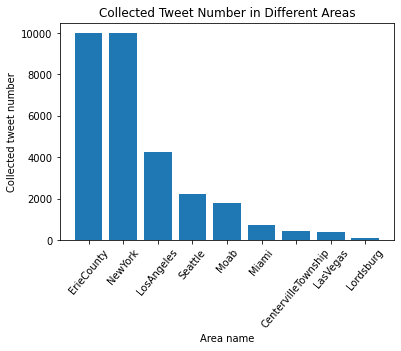

In [353]:
plt.bar(tweets_data_groupbyareas_count['area_name'],tweets_data_groupbyareas_count['count'])
plt.xlabel('Area name')
plt.ylabel('Collected tweet number')
plt.title('Collected Tweet Number in Different Areas')
plt.xticks(rotation=50)
plt.show()

• Percentage of tweets that are (or contain) retweets.

In [158]:
def if_retweets(string):
#     check if the string starts with RT, if it does, then return 1, else return 0
    if string.startswith('RT '):
        return 1
    else:
        return 0

In [159]:
tweets_data['if_retweets']=tweets_data['tweet.full_text'].apply(lambda x:if_retweets(x))

In [160]:
tweets_data_groupbyareas_1=tweets_data[['area_name','if_retweets']].groupby("area_name").sum(['if_retweets']).reset_index()
tweets_data_groupbyareas_2=tweets_data[['area_name','if_retweets']].groupby("area_name").count().reset_index()
tweets_data_groupbyareas_2.columns=['area_name','total_number']
tweets_data_groupbyareas=pd.merge(tweets_data_groupbyareas_1,tweets_data_groupbyareas_2,how='left',on=["area_name"],right_index=False)

In [167]:
tweets_data_groupbyareas['retweet_percentage']=tweets_data_groupbyareas['if_retweets']/tweets_data_groupbyareas['total_number']
tweets_data_groupbyareas=tweets_data_groupbyareas.sort_values(by='retweet_percentage', ascending=False)
tweets_data_groupbyareas

,area_name,if_retweets,total_number,retweet_percentage
1,ErieCounty,6965,10000,0.696500
8,Seattle,1510,2210,0.683258
7,NewYork,6406,10000,0.640600
6,Moab,1064,1709,0.622586
0,CentervilleTownship,213,437,0.487414
2,LasVegas,193,396,0.487374
4,LosAngeles,1951,4260,0.457981
5,Miami,260,731,0.355677
3,Lordsburg,17,88,0.193182


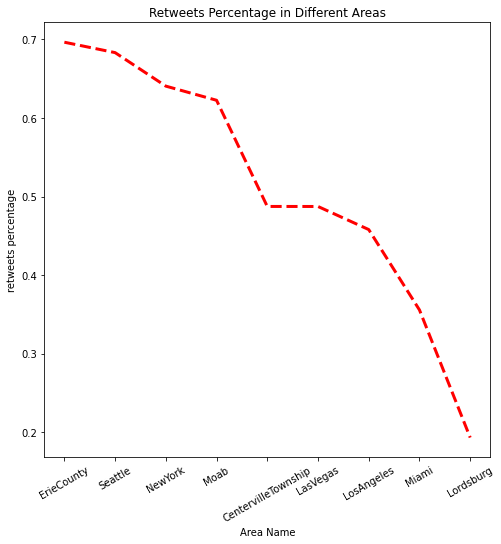

In [180]:
plt.figure(figsize=(8,8))
plt.plot(tweets_data_groupbyareas['area_name'],tweets_data_groupbyareas['retweet_percentage'],'r--',linewidth=3)
plt.xlabel('Area Name')
plt.ylabel('retweets percentage')
plt.title('Retweets Percentage in Different Areas')
plt.xticks(rotation=30)
plt.show()


• Percentage of collected tweets that are English.

In [234]:
print('The total percentage of the collected English Tweets is: {:.2%}'.format(tweets_data['tweet.lang'].value_counts()['en']/tweets_data['tweet.lang'].value_counts().sum()))

The total percentage of the collected English Tweets is: 93.49%


• Percentage of tweets that contain URLs

In [236]:
def if_URL(string):
    # findall() has been used 
    # with valid conditions for urls in string
    # return 1 if there is a URL in the string, else return 0
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)      
    if(len(url)>0):
        return 1
    else:
        return 0

In [240]:
tweets_data['tweets_text_urls']=tweets_data['tweet.full_text'].apply(lambda x:if_URL(x))
print("Percentage of tweets that contain URLs is: {:.2%}".format(tweets_data['tweets_text_urls'].sum()/len(tweets_data['tweets_text_urls']),"%"))

Percentage of tweets that contain URLs is: 35.67%


• Table of the 30 most frequent hashtags in the following format: [rank, hashtag, frequency]. Example: [1, #coronavirus, 2500]

In [241]:
def find_hashtag(string):
#     input a string and output a array of hashtag
    return re.findall(r"#(\w+)", string)

In [243]:
tweets_data['hashtag_array']=tweets_data['tweet.full_text'].apply(lambda x:find_hashtag(x))

In [245]:
sorted_hashtags=[(l,k) for k,l in sorted([(j,i) for i,j in Counter(tweets_data['hashtag_array'].sum()).items()], reverse=True)]

In [261]:
for x,i in zip(sorted_hashtags[:30],range(30)):
#     print('[',i+1,', #',x[0],',',x[0],']')
    print('[{}, #{}, {}]'.format(i+1,x[0],x[1]))

[1, #COVID19, 4234]
[2, #vaccine, 4104]
[3, #GetVaccinated, 3285]
[4, #CovidVaccine, 2937]
[5, #AstraZeneca, 2929]
[6, #vaccinated, 2254]
[7, #COVID19Vaccine, 1997]
[8, #Vaccine, 1309]
[9, #Pfizer, 1012]
[10, #Moderna, 767]
[11, #vaccination, 679]
[12, #Ontario, 673]
[13, #StaySafe, 497]
[14, #covidvaccine, 469]
[15, #COVID, 468]
[16, #Friends, 463]
[17, #animatedmockumentry, 461]
[18, #PolishRoyaltyandtheGoat, 461]
[19, #India, 461]
[20, #VaccinesWork, 458]
[21, #coronavirus, 440]
[22, #astrazeneca, 407]
[23, #JohnsonandJohnson, 377]
[24, #covid19, 351]
[25, #COVID19vaccine, 327]
[26, #Vaccinated, 322]
[27, #Kashmir, 322]
[28, #PfizerVaccine, 299]
[29, #covid, 297]
[30, #WearAMask, 289]


### Data preprocessing

• Filter languages other than English

In [358]:
pre_tweets_data_1=tweets_data[tweets_data['tweet.lang']=='en']

• data preprocess:  
    1) Set the tweet to lowercase  
    2) Filter URL links  
    3) Remove user @ references and '#' from tweet  
    4) Filter emoticons  
    5) Filter punctuation  
    6) Remove stopwords  

In [382]:
def preprocess_tweet_text(tweet):
#     set the tweet to lowercase
    tweet=tweet.lower()
#     Filter URL links
    tweet=re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
# Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
# Filter emoticons
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    tweet=re.sub(emoj, '', tweet)
#     Filter punctuation
    tweet=re.sub(r'[^\w\s]', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
# Do not apply both. Remember that stemming and lemmatization are normalization techniques, 
# and it is recommended to use only one approach to normalize.
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [371]:
pre_tweets_data_1['tweet.full_text']=pre_tweets_data_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text(x))

<ipython-input-371-8c8891e6fe13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_tweets_data_1['tweet.full_text']=pre_tweets_data_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text(x))


In [334]:
pre_tweets_data_1.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,area_name
1,labyrinthweaver Happy to get whatever vaccine ...,2021-04-27 13:51:23,1387041690276360203,Hira Ambrosino,HiraAmbrosino,334675619,Los Angeles,http://t.co/KwpfYtGAN9,"Grew up in Japan, LA is my home. Actor on ABC...",True,...,189,6027.0,2191.0,40.0,2011-07-13 13:55:27,https://pbs.twimg.com/profile_images/115811806...,False,False,en,LosAngeles
2,RT JessLint Thank you to Bruce_Power and npxi...,2021-04-27 13:50:50,1387041551973425165,NPX,npxinnovation,988083645603766272,"Toronto, Ontario",https://t.co/jfATmtuMrU,Innovation in Everything We Do,False,...,187,475.0,572.0,0.0,2018-04-22 15:54:33,https://pbs.twimg.com/profile_images/131459343...,True,False,en,LosAngeles
4,42 of Americans have at least one dose of COVI...,2021-04-27 13:40:55,1387039054546366468,DrRPalmquist,DrPalmquist,1141340430514003968,"Los Angeles, CA",https://t.co/oqar5Baxjy,"Veterinarian changing life one poem, one herb ...",False,...,1324,23689.0,17165.0,8.0,2019-06-19 13:42:18,https://pbs.twimg.com/profile_images/114134099...,True,False,en,LosAngeles
5,NEJM COVID19Vaccine related immune thrombocyto...,2021-04-27 13:36:00,1387037816748576777,DrRPalmquist,DrPalmquist,1141340430514003968,"Los Angeles, CA",https://t.co/oqar5Baxjy,"Veterinarian changing life one poem, one herb ...",False,...,1324,23689.0,17165.0,8.0,2019-06-19 13:42:18,https://pbs.twimg.com/profile_images/114134099...,True,False,en,LosAngeles
6,Another reason to moderate your alcohol intake...,2021-04-27 13:32:22,1387036905976434697,Jon Burk,MrJonBurk,300963571,"Los Angeles, CA",https://t.co/JQkQP1fRvE,Marketing | Writing | Production | Digital Str...,False,...,894,3259.0,17937.0,152.0,2011-05-18 17:02:01,https://pbs.twimg.com/profile_images/133016494...,False,False,en,LosAngeles


### Sentiment Analysis on Twitter

This dataset encoded the target variable with a 3-point ordinal scale: 0 = negative, 2 = neutral, 4 = positive.

Dataset: https://www.dropbox.com/s/du1z2m910a68ehk/training.csv?dl=0

In [380]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [381]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [376]:
# implement vectorization using tf-idf
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

• The target column is comprised of the integer values 0, 2, and 4. To convert the integer results to be easily understood by users, which is Negative, Neutral and positive.

In [378]:
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [384]:
# Load dataset
dataset = load_dataset("training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)

In [388]:
# Split dataset into Train, Test
# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))

# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs',max_iter=10000)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.766403125
0.785259375


#### predict the Tweet sentiment

In [443]:
test_ds = pre_tweets_data_1[['area_name','tweet.full_text']]

# Creating text feature
test_ds['tweet.full_text'] = test_ds["tweet.full_text"].apply(lambda x:preprocess_tweet_text(x))
test_feature = tf_vector.transform(np.array(test_ds.iloc[:, 1]).ravel())

# Using Logistic Regression model for prediction
test_prediction_lr = LR_model.predict(test_feature)

# get the sentiment result to a table
test_result_ds = pd.DataFrame({'area_name': test_ds.area_name, 'prediction':test_prediction_lr})
# convert int to string
test_result_ds['prediction']=test_result_ds['prediction'].apply(lambda x:int_to_string(x))

<ipython-input-443-9454589f8cec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ds['tweet.full_text'] = test_ds["tweet.full_text"].apply(lambda x:preprocess_tweet_text(x))


In [444]:
test_result_ds['count']=1
test_result_ds

,area_name,prediction,count
1,LosAngeles,Positive,1
2,LosAngeles,Positive,1
4,LosAngeles,Positive,1
5,LosAngeles,Negative,1
6,LosAngeles,Negative,1
...,...,...,...
29933,LasVegas,Negative,1
29934,LasVegas,Positive,1
29935,LasVegas,Positive,1
29936,LasVegas,Positive,1


In [445]:
test_result_ds=test_result_ds.groupby(['area_name','prediction']).count().reset_index()
test_result_ds

,area_name,prediction,count
0,CentervilleTownship,Negative,148
1,CentervilleTownship,Positive,280
2,ErieCounty,Negative,3976
3,ErieCounty,Positive,5418
4,LasVegas,Negative,179
5,LasVegas,Positive,206
6,Lordsburg,Negative,34
7,Lordsburg,Positive,43
8,LosAngeles,Negative,1199
9,LosAngeles,Positive,2767


In [447]:
test_result_ds_sum=test_result_ds.groupby('area_name').sum().reset_index()
test_result_ds_sum.columns=['area_name','sum']
test_result_ds_sum

,area_name,sum
0,CentervilleTownship,428
1,ErieCounty,9394
2,LasVegas,385
3,Lordsburg,77
4,LosAngeles,3966
5,Miami,474
6,Moab,1695
7,NewYork,9466
8,Seattle,2101


In [448]:
test_result_ds=pd.merge(test_result_ds,test_result_ds_sum,how='left',on=["area_name"],right_index=False)

In [449]:
test_result_ds

,area_name,prediction,count,sum
0,CentervilleTownship,Negative,148,428
1,CentervilleTownship,Positive,280,428
2,ErieCounty,Negative,3976,9394
3,ErieCounty,Positive,5418,9394
4,LasVegas,Negative,179,385
5,LasVegas,Positive,206,385
6,Lordsburg,Negative,34,77
7,Lordsburg,Positive,43,77
8,LosAngeles,Negative,1199,3966
9,LosAngeles,Positive,2767,3966


In [450]:
test_result_ds['rate']=test_result_ds['count']/test_result_ds['sum']

In [459]:
positive_rate=test_result_ds[test_result_ds['prediction']=='Positive'].sort_values(by='rate', ascending=False)

In [460]:
positive_rate

,area_name,prediction,count,sum,rate
17,Seattle,Positive,1533,2101,0.729653
9,LosAngeles,Positive,2767,3966,0.697680
11,Miami,Positive,311,474,0.656118
1,CentervilleTownship,Positive,280,428,0.654206
15,NewYork,Positive,6078,9466,0.642087
3,ErieCounty,Positive,5418,9394,0.576751
13,Moab,Positive,950,1695,0.560472
7,Lordsburg,Positive,43,77,0.558442
5,LasVegas,Positive,206,385,0.535065


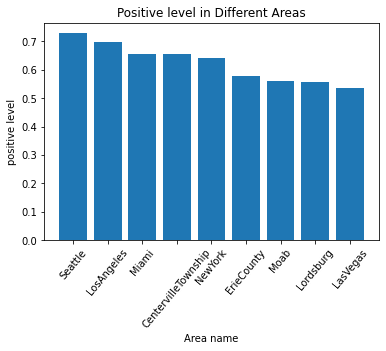

In [463]:
plt.bar(positive_rate['area_name'],positive_rate['rate'])
plt.xlabel('Area name')
plt.ylabel('positive level')
plt.title('Positive level in Different Areas')
plt.xticks(rotation=50)
plt.show()

We can read from the sentiment analysis result that the highest positive level is Seattle, which is 73%. And we can see that the lowest is Las Vegas, which positive level is only 53.5%. For big cities like Seattle, Los Angeles, Miami, they both have over 60% positive level.